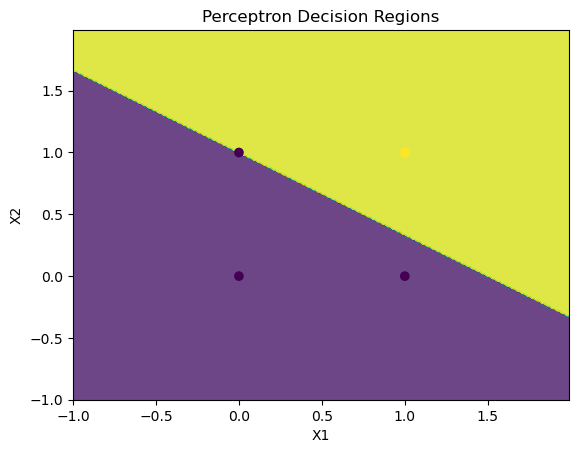

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, -1, -1, 1])

w = np.zeros(X.shape[1])
b = 0

for _ in range(6):
    for i in range(X.shape[0]):
        y_pred = np.sign(np.dot(X[i], w) + b)
        
        if y_pred != Y[i]:
            w += 0.3 * Y[i] * X[i]
            b += 0.3 * Y[i]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Regions')
plt.show()

In [ ]:
import numpy as np

# Step 1: Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 2: Define the training function for the neural network
def train_neural_network(X, y, learning_rate, epochs):
    # Step 3: Initialize the weights and biases with random values
    input_neurons = X.shape[1]
    hidden_neurons = 4
    output_neurons = y.shape[1]
    
    hidden_weights = np.random.uniform(size=(input_neurons, hidden_neurons))
    hidden_bias = np.random.uniform(size=(1, hidden_neurons))
    output_weights = np.random.uniform(size=(hidden_neurons, output_neurons))
    output_bias = np.random.uniform(size=(1, output_neurons))
    
    # Step 4: Perform the training iterations
    for i in range(epochs):
        # Step 4.1: Forward propagation
        hidden_layer_activation = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_activation)

        # Step 4.2: Backward propagation
        error = y - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        # Step 4.3: Update the weights and biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    
    # Step 5: Return the predicted output
    return predicted_output

# Example usage
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train the Neural Network
predicted_output = train_neural_network(X, y, learning_rate=0.1, epochs=10000)

print(predicted_output)